# *Titanic - Machine Learning from Disaster*

## Probelem Statement

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Statement Analysis
* Supervised Machine Learning Problem.
* The Target Value is **Survived**.

## Goal
Using this model, We will try to understand what sort of people were more likely to **survive** than others.

# *Hypothesis Generation*
* Females have more chance of surviving.
* Children have more chance of surviving.
* Upper Class (VIPS) have more chance of surviving.
* People with less siblings have more chance of surviving.
* Person with no family/sibings have more chance of surviving.
* Swimmers have more chance of surviving.


# *Libraries*

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os # Path to file
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot  as plt # Data visulization
import seaborn as sns  # Data visulization
import warnings # warning filter
%matplotlib inline

# Import Coounter
from collections import Counter


sns.set(style="darkgrid")


In [2]:

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
# Loading Data.
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')


In [4]:
# lets check data
print(f'Train Dataset (row, col): {train.shape} \n')
print('\nTrain Dataset Information:\n')
print(train.info())

print(f'\nTest Dataset (row, col): {test.shape} \n')
print('\nTest Dataset Information:\n')
print(test.info())

print('\nTrain Dataset Values:\n')
train.apply(lambda x:x.unique())


Train Dataset (row, col): (891, 12) 


Train Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Test Dataset (row, col): (418, 11) 


Test Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 

PassengerId    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Survived                                                  [0, 1]
Pclass                                                 [3, 1, 2]
Name           [Braund, Mr. Owen Harris, Cumings, Mrs. John B...
Sex                                               [male, female]
Age            [22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...
SibSp                                      [1, 0, 3, 4, 2, 5, 8]
Parch                                      [0, 1, 2, 5, 3, 4, 6]
Ticket         [A/5 21171, PC 17599, STON/O2. 3101282, 113803...
Fare           [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....
Cabin          [nan, C85, C123, E46, G6, C103, D56, A6, C23 C...
Embarked                                          [S, C, Q, nan]
dtype: object

## About Dataset

This dataset is named Titanic Survival. The dataset contains a set of **891** records under **12** attributes:

## Column Name and their Description

* **PassengerId**: Unique passenger ID.
* **Name** : name of passenger.
* **Pclass** : Ticket class (A proxy for **socio-economic status** (SES)).
* **Sex** : gender of passenger.
* **Age** : age of passenger.
* **SibSp**: number of siblings/spouse of passenger.
* **Parch** : number of parents of passenger.
* **Ticket** : ticket number.
* **Fare** :Passenger fare.
* **Cabin** : Cabin number.
* **Embarked** : Port of Embarkation.

## Variable Notes
**Pclass**: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

**Age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
* **Sibling** = brother, sister, stepbrother, stepsister
* **Spouse** = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
* **Parent** = mother, father
* **Child** = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore **parch=0** for them.


# *Data Analysis*


In [5]:
# Check Dupicates
train.drop_duplicates(inplace=True)

In [6]:
# Data Summery
train.describe(include=[object, np.number])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Observations
* Most passengers are **Lower class passengers**.
* Most passengers are **male**.
* Average Age of passengers is **28** oldest passenger=80, youngest=0.42 (about 5 months).
* Most passengers are **alone**.
* Average Fare is 14.45 pounds



In [7]:
# Missing values
(train.isnull().sum()/train.shape[0]) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### Missing values
* Age has **19.8%** missing values.
* Cabin has **77%** missing values.
* Embarked has **0.22%** missing values

# *Data Exploration*
Lets combine both datasets since both are similier
Below are the steps involved to understand, clean and prepare your data for building your predictive model:

* Missing values treatment
* Outlier treatment
* Variable Identification
* Univariate Analysis
* Bi-variate Analysis
* Variable transformation
* Variable creation

In [8]:
# Combining Datasets
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True)
print('After combining the datasets (row,col): ', data.shape)

After combining the datasets (row,col):  (1309, 13)


* ### Missing Values
1. Numeric Values
2. Categorial Values

In [9]:
# Fill empty and NaNs values with NaN
# Missing values
(data.isnull().sum()/data.shape[0]) * 100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
source          0.000000
dtype: float64

* Age here is **continuies value** and also age is corelated with **parch/sibling** and since there is subpopulation in age is **children** having higher chance of **surrvival** we need visulize the age **carefully**.

In [10]:
# Lets deal with Age first
data.Age.describe()


count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

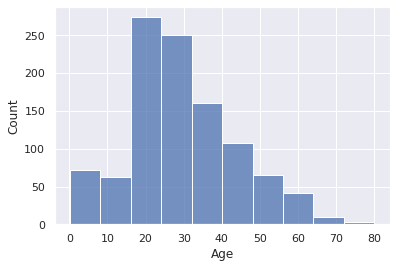

In [11]:
ax = sns.histplot(x=data['Age'], bins=10)

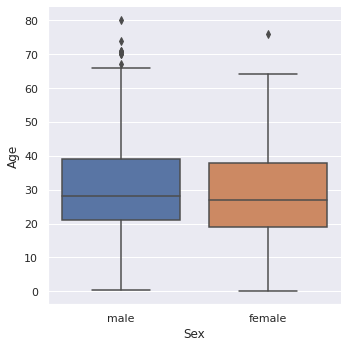

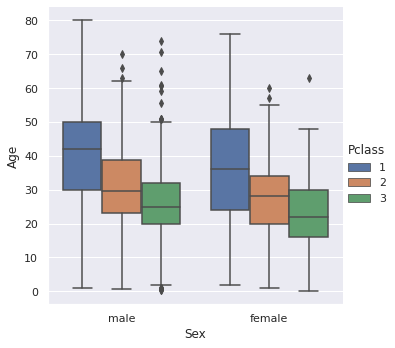

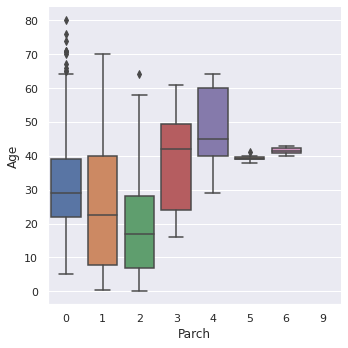

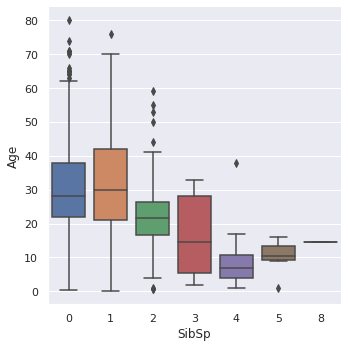

In [12]:
# Explore Age with Sex, Parch, Pclass, SibSp
age = sns.catplot(data=data, x='Sex', y='Age', kind='box')
age = sns.catplot(data=data, x='Sex', y='Age', hue='Pclass', kind='box')
age = sns.catplot(data=data, x='Parch', y='Age', kind='box')
age = sns.catplot(data=data, x='SibSp', y='Age', kind='box')

## Observations
* Age and **Sex** has almost **same distribution**.
* **1st class** passenger are **older** then **2nd class**, and 2nd are **older** then **3rd class**.
* Person having more **parents/children** are **older**.
* Person having more **siblings/spouse** are **younger**.

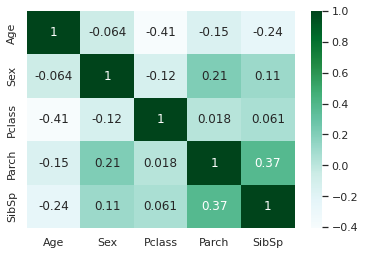

In [13]:
# Convert Sex 0, 1 into male female
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
age = sns.heatmap(data=data[['Age','Sex','Pclass', 'Parch', 'SibSp']].corr(), cmap='BuGn' , annot=True)

### Observations
* Above heatmap **confirms the catplots except Parch**. age is not correlated with sex, But **negativly correlated with Parch, Pclass, SibSp**

In [14]:
# Imputate missing values of age with median
data['Age'] = data['Age'].fillna(data['Age'].median())

# delete cabin data becuase it contains % missing data
data = data.drop('Cabin', axis=1)

# fill missing values in Embarked with mode
data.Embarked = data.Embarked.fillna('S')


In [15]:
print('Missing Values afer imputation \n')
(data.isnull().sum()/data.shape[0]) * 100

Missing Values afer imputation 



PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Embarked        0.000000
source          0.000000
dtype: float64

* ### Outliers

In [16]:
# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(data,2,["Age","SibSp","Parch","Fare"])

#  Show the outliers rows
print("Outliers \n\n")
data.loc[Outliers_to_drop]
#  Show the outliers rows

Outliers 




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,source
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,S,train
16,17,0.0,3,"Rice, Master. Eugene",0,2.0,4,1,382652,29.1250,Q,train
119,120,0.0,3,"Andersson, Miss. Ellis Anna Maria",1,2.0,4,2,347082,31.2750,S,train
164,165,0.0,3,"Panula, Master. Eino Viljami",0,1.0,4,1,3101295,39.6875,S,train
386,387,0.0,3,"Goodwin, Master. Sidney Leonard",0,1.0,5,2,CA 2144,46.9000,S,train
642,643,0.0,3,"Skoog, Miss. Margit Elizabeth",1,2.0,3,2,347088,27.9000,S,train
824,825,0.0,3,"Panula, Master. Urho Abraham",0,2.0,4,1,3101295,39.6875,S,train


In [17]:
# Drop outliers
data = data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,train
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,train
